# 图像的梯度

(512, 512)


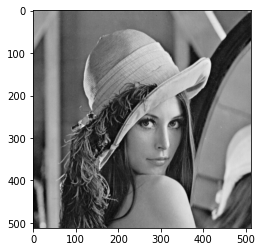

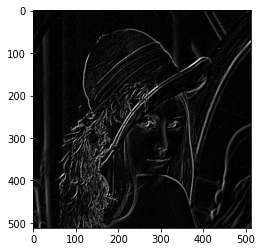

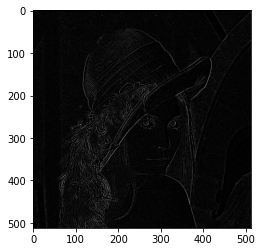

In [2]:
import cv2
from  matplotlib import pyplot as plt
%matplotlib inline

def cvshow(img):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def show(img):
    if img.ndim == 2:
        plt.imshow(img,cmap="gray")
    elif img.ndim == 3:
        plt.imshow(img)
    plt.show()

img = cv2.imread('images/lena.png',0)
print(img.shape)
show(img)
#--------Sobel
sx = cv2.Sobel(img, -1, 1, 0)
sy = cv2.Sobel(img, -1, 0, 1)
sxy = cv2.addWeighted(sx, 0.5, sy, 0.5, 0)
show(sxy)
#---------Laplacian
lap = cv2.Laplacian(img, -1)
show(lap)

# 边缘检测

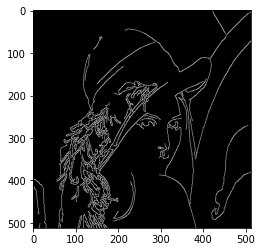

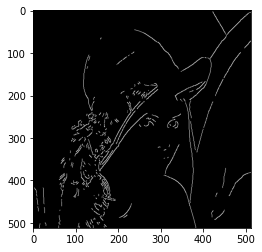

In [4]:
img = cv2.imread('images/lena.png',0)
img = cv2.GaussianBlur(img,[5, 5], 0, 0 )
edge1 = cv2.Canny(img, 50, 200)
show(edge1)
edge2 = cv2.Canny(img, 180, 200)
show(edge2)

# 霍夫变换直线和圆形检测

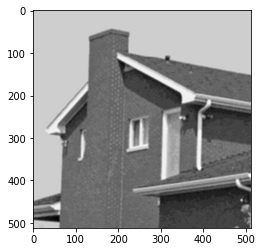

[[-8.         2.0594885]]
[[458.        1.43117]]
[[448.        1.43117]]
[[8.        2.0594885]]
[[61.         1.7453293]]
[[207.          0.7330383]]
[[467.        1.43117]]
[[53.         1.7627826]]
[[1.3500000e+02 3.4906585e-02]]
[[8.0000000e+01 3.4906585e-02]]


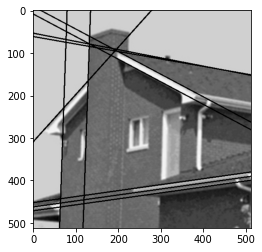

In [5]:

import numpy as np
#----------直线检测
img = cv2.imread('images/house.tif', 0)
show(img)
img = cv2.GaussianBlur(img,[5, 5], 0, 0 )
edges = cv2.Canny(img, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi/180, 120)
for line in lines:
    print(line)
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    #确定一个与法线相交的点
    x0 = a*rho
    y0 = b*rho
    #以这个点为基础扩展2个点
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*a)
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*a)
    cv2.line(img, (x1, y1), (x2, y2),(0), 2)
show(img)

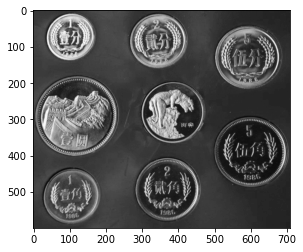

107
88
78
85
80
74
70
62


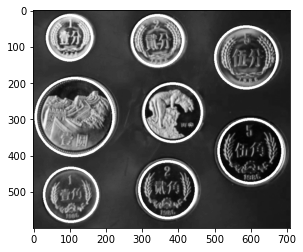

In [18]:
#---------圆形检测
img = cv2.imread('images/coins2.jpeg', 0)
show(img)
img = cv2.GaussianBlur(img,[5, 5], 0, 0 )
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=90, minRadius=50, maxRadius=200)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    print(i[2])
    cv2.circle(img, (i[0],i[1]), i[2], (255), 5)
show(img)